In [1]:
# Project 1: Sales Forecasting with Linear Regression
# Problem Statement: Businesses struggle to estimate future sales based on past performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("E:/AICTE Intern Tasks/RISE/Datasets/1_Sales.csv", encoding_errors='replace')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
# Here i need a feature called Product name, which the description contains the product names alone. So, i renamed it to Product
# Here invoice date is known to be Date so, we can rename it also

df.rename(columns={'Description': 'Product'}, inplace=True)
df.rename(columns={'InvoiceDate': 'Date'}, inplace=True)

In [8]:
# CustomerID to integers (convert non-numeric CustomerID to NaN)
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)

In [9]:
df.head()

,InvoiceNo,StockCode,Product,Quantity,Date,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   406829 non-null  object 
 1   StockCode   406829 non-null  object 
 2   Product     406829 non-null  object 
 3   Quantity    406829 non-null  int64  
 4   Date        406829 non-null  object 
 5   UnitPrice   406829 non-null  float64
 6   CustomerID  406829 non-null  int64  
 7   Country     406829 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.9+ MB


In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Product', 'Quantity', 'Date', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

In [12]:
# now check for missing values

df.isnull().sum()

InvoiceNo     0
StockCode     0
Product       0
Quantity      0
Date          0
UnitPrice     0
CustomerID    0
Country       0
dtype: int64

In [13]:
#Fill all missing values with 0

df.fillna(0, inplace=True)
df.isnull().sum()

InvoiceNo     0
StockCode     0
Product       0
Quantity      0
Date          0
UnitPrice     0
CustomerID    0
Country       0
dtype: int64

In [14]:
# Here we need another feature called Revenue 
# Revenue = Quantity * Unit Price '''

df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [15]:
df.head()

,InvoiceNo,StockCode,Product,Quantity,Date,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34


In [16]:
df.shape

(406829, 9)

In [17]:
# Sales Forecasting

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
# Convert 'Date' feature to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Aggregate daily revenue
sales = df.groupby('Date')['Revenue'].sum().reset_index()

In [19]:
# Convert Date to ordinal for regression model
sales['Ordinal_date'] = sales['Date'].map(pd.Timestamp.toordinal)

In [20]:
sales

,Date,Revenue,Ordinal_date
0,2010-12-01 08:26:00,139.12,734107
1,2010-12-01 08:28:00,22.20,734107
2,2010-12-01 08:34:00,348.78,734107
3,2010-12-01 08:35:00,17.85,734107
4,2010-12-01 08:45:00,855.86,734107
...,...,...,...
20455,2011-12-09 12:23:00,124.60,734480
20456,2011-12-09 12:25:00,140.64,734480
20457,2011-12-09 12:31:00,329.05,734480
20458,2011-12-09 12:49:00,339.20,734480


In [21]:
# Features and target
X = sales[['Ordinal_date']]
y = sales['Revenue']

In [22]:
# training, testing and spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [23]:
# Now we can perform model training

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# Predictions 
y_pred = model.predict(X_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 3803.71


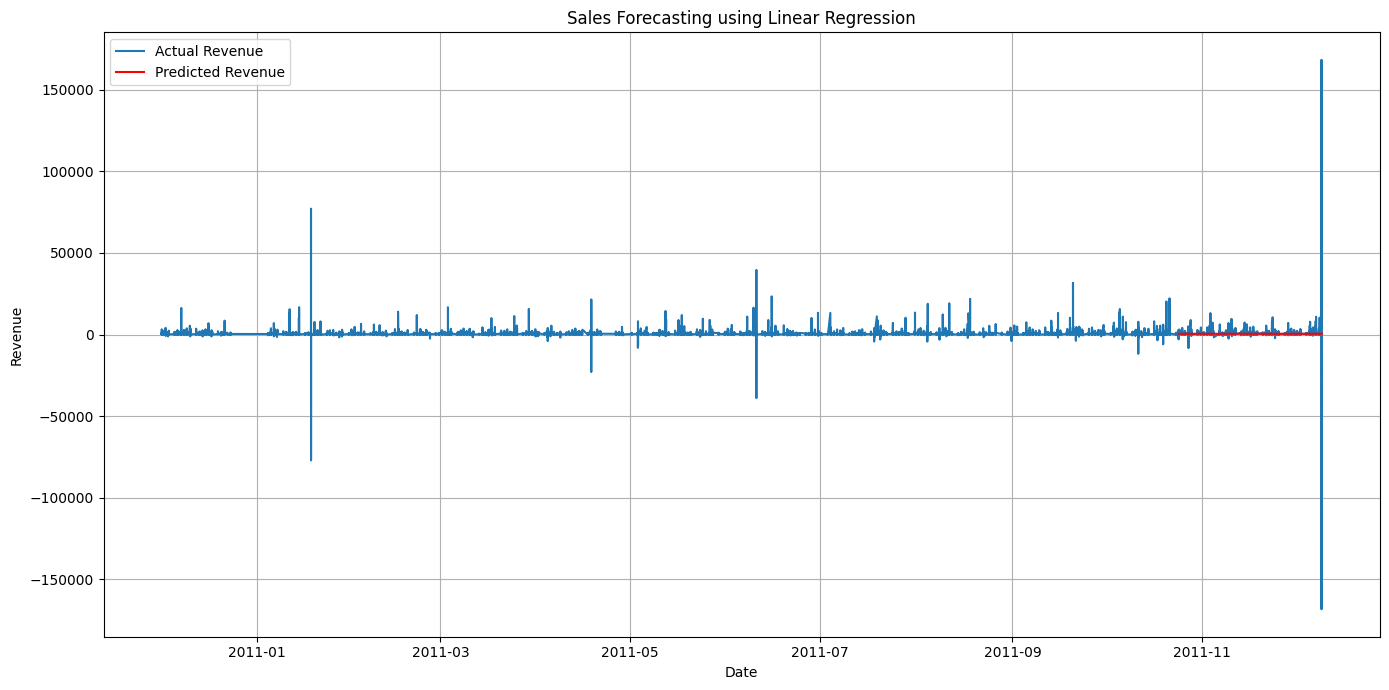

In [26]:
# Step 1: Create the plot window
# Step 2: Plot the actual revenue data
# Step 3: Plot the predicted revenue (from the test set)
# Step 4: Customize the plot


plt.figure(figsize=(14, 7))
plt.plot(sales['Date'], sales['Revenue'], label='Actual Revenue')
plt.plot(sales['Date'].iloc[len(X_train):],y_pred,color='red',label='Predicted Revenue')
plt.title('Sales Forecasting using Linear Regression') 
plt.xlabel('Date')     
plt.ylabel('Revenue') 
plt.legend()          
plt.grid(True)        
plt.tight_layout()   
plt.show()  

In [27]:
last_date = sales['Date'].max()

# Create a range of 30 future dates (This generates 30 new dates into the future)
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_ordinals_df = pd.DataFrame(future_ordinals, columns=['Ordinal_date'])

future_predictions = model.predict(future_ordinals_df)

In [28]:
# Create a DataFrame with forecasted results
''' Dataset (sales) already has historical sales data. But, forecast_df is for the future predictions.
The purpose of forecast_df is to store: Future Dates (which are not present in the original dataset) 
and Predicted Revenue for those future dates (generated using the model)'''

forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Revenue': future_predictions})
print("\nForecast for next 5 days:", forecast_df.head())


Forecast for next 5 days:                  Date  Predicted Revenue
0 2011-12-10 12:50:00         477.217957
1 2011-12-11 12:50:00         477.587392
2 2011-12-12 12:50:00         477.956827
3 2011-12-13 12:50:00         478.326262
4 2011-12-14 12:50:00         478.695696


In [29]:
forecast_df.to_csv('E:/AICTE Intern Tasks/RISE/Datasets/1_SalesForecast(Next 30 days)_Cleaned.csv', index=False)